# CAHN HILLARD PHASE FIELD EQUATION SOLVER : 2D

Importing the required library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

Define the Physical parameters

In [2]:
h = 1                 # Grid size in x and y directions
N = 64                # Grid Dimension in x and y directions
L = N * h             # Boundary Dimension
eps = 4               # Gradient Energy
U = 1                 # Free Energy Multiplier
a = 0.01              # Initialization parameter
M = 1                 # Diffusion Coefficient
delta = 10**-8        # Tolerance

Defining the arrays representing grid space in x and y directions

In [3]:
x = np.arange(64)     # Defining an array to store grid points in x direction
y = x                 # Defining an array to store grid points in x direction

Defining the time step size and no of time steps

In [4]:
dt = 0.001            # Defining the time step size
nsteps = 30000        # Defining the no of time steps

Defining the functions to compute the bulk free energy density 

$$ f(\phi) = U(\phi- 1)^2(\phi + 1)^2 $$

In [5]:
def f(xi): return np.square(xi - 1) * np.square(xi + 1)

Defining the function to compute the first derivative of the free energy function w.r.t $\phi$ 

$$ \frac{\partial f(\phi)}{\partial \phi} = 4U\phi(\phi^2 - 1) $$ 

In [6]:
def f1(xj): return 4 * xj * (np.square(xj) - 1)

Defining the function to compute second derivative of free energy function w.r.t $\phi$
$$\frac{\partial^2 f}{\partial \phi^2} = 4U(3\phi^2 - 1)$$

In [7]:
def f2(xk): return 12*np.square(xk) - 4

Defining a function to compute third derivative of free energy function w.r.t $\phi$

$$\frac{\partial^3 f}{\partial \phi^3} = 24U\phi$$

In [8]:
def f3(xl): return 24*(xl)

Initializing the phase field distribution

Filling the phase field array phi with random numbers between -a/2 and a/2

In [9]:
phi = np.random.uniform(low=-a / 2, high=a / 2, size=(N, N))
phi1 = np.random.uniform(low=-a+1 / 2, high=a+1 / 2, size=(N, N))

Defining arrays for applying the Periodic boundary conditions

$$\phi(x, y) = \phi(x + L, y) = \phi(x, y + L)$$

In [10]:
plus = np.append(np.arange(1, N), 0)

minus = np.append(N - 1, np.arange(0, N - 1))

 Initializing an array to store the value of free energy functional over time

In [11]:
Fplot = np.arange(nsteps)

## Cahn Hillard phase field evolution equation
Solving the Allen Cahn phase field equation

$$\frac{\partial \phi}{\partial t} = \nabla . \left[M \nabla\left(\frac{\delta F[\phi]}{\delta \phi}\right)\right]
                                    = M\nabla^2\left[\frac{\partial f}{\partial \phi} - 2\epsilon\nabla^2\phi\right]$$
$$\frac{\partial \phi}{\partial t} = M\left[\frac{\partial^2 f}{\phi^2}\nabla^2\phi + \frac{\partial^3 f}{\phi^3}(\nabla \phi)^2 - 2\epsilon\nabla^4\phi \right] \equiv g[\phi]$$

## Laplacian approximation using Central Difference method
Using Central difference Method to compute the numerical approximation of the Laplacian of phase field in 2D

$$\nabla^2\phi = \frac{\phi(x + h, y) + \phi(x, y + h) + \phi(x - h, y) + \phi(x, y - h) - 4\phi(x, y) }{h^2}$$

## Central Difference approximation of $\nabla^4\phi$
$$\nabla^4\phi =\frac{\nabla^2\phi(x + h, y) + \nabla^2\phi(x, y + h) + \nabla^2\phi(x - h, y) + \nabla^2\phi(x, y - h) - 4\nabla^2\phi(x, y) }{h^2}$$



## Derivative approximation using Central Difference method
Derivative of phase field in x direction, using Central Difference Method


$$\frac{\partial f}{\partial x} = \frac{\phi(x + h, y) - \phi(x - h, y)}{2h}$$ 



Derivative of phase field in y direction, using Central Difference Method

$$\frac{\partial f}{\partial y} = \frac{\phi(x, y + h) - \phi(x, y - h)}{2h}$$



## Free energy functional 

Computing the numerical approximation of free energy functional in 2D

$$F[\phi(x, y)] = \int_{V} [f(\phi(x, y)) + \epsilon |\nabla \phi(x, y)|^2] dV $$

Here $\phi$ is a two diemnsional function, i.e. $\phi(x, y)$. So gradient of $\phi(x, y)$ will have two components
$\frac{\partial \phi(x, y)}{x}$ and $\frac{\partial \phi(x, y)}{y}$.

Using this we get the norm of the gradient of the phase fiel as
$$|\nabla \phi(x, y)| = \sqrt{\left(\frac{\partial \phi(x, y)}{x}\right)^2 + \left(\frac{\partial \phi(x, y)}{y}\right)^2}$$


## Computing the numerical approximation of g[$\phi$]


$$g[\phi]
                                    \equiv \frac{\partial^2 f}{\phi^2}\nabla^2\phi + \frac{\partial^3 f}{\phi^3}(\nabla \phi)^2 - 2\epsilon\nabla^4\phi$$

## Evolution equation

Computing evolution of the phase field using Allen-Cahn equation

$$ \phi(x, y; t + \Delta t) = \phi(x, y; t) + \frac{\Delta t}{2}.(g[\phi(x, y; t) + g[\phi(x, y; t+\Delta t) ])$$

## Implicit euler Method Algorithm

$\mathbf{STEP 1 :}$ Compute the predictor 
$$\phi_0 = \phi(t) + g[\phi(t)].\Delta t$$

$\mathbf{STEP 2 :}$ Compute the corrector 
$$\phi_1 = \phi(t) + (g[\phi(t)] + g[\phi_0(t)]) .\frac{\Delta}{2} t$$

$\mathbf{STEP 3 :}$ Compute the error 
$$ If \hspace{2pt} max |\phi_1 - \phi_0| < \delta, return \hspace{2pt} with \hspace{2pt}  \phi(x, y; t+\Delta t) := \phi_1$$

$\mathbf{STEP 4 :}$ Else set
$\phi_0 := \phi_1$ and
go to $\mathbf{STEP 2}$

In [12]:
for i in range(nsteps):

    # Defining a function to compute numerical approximation of Laplacian of phase field in 2D using Central Difference method
    
    def lphi(phi): return (phi[:, plus] + phi[:, minus] + phi[plus, :] + phi[minus, :] - 4 * phi) / (h * h)

    
    # Defining a function to compute numerical approximation of Laplacian of Laplace using Central Difference Method in 2D
    
    def llphi(phi) : return ( lphi(phi)[:, plus] +  lphi(phi)[:, minus] +  lphi(phi)[plus, :] +  
                             lphi(phi)[minus, :] - 4 *  lphi(phi)) / (h * h)

    # Derivative of phase field in x direction : dphi/dx, using Central Difference Method with periodic boundary conditions

    def phidx(phi) : return (phi[:, plus] - phi[:, minus]) / (2 * h)

    # Derivative of phase field in y direction : dphi/dy, using Central Difference Method with periodic boundary conditions

    def phidy(phi): return (phi[plus, :] - phi[minus, :]) / (2 * h)

    # Computing the numerical approximation of free energy functional in 2D

    F = sum(sum(f(phi))) * U + sum(sum(np.square(phidx(phi)) + np.square(phidy(phi)))) * eps

    # Storing the Free energy functional value for plotting

    Fplot[i] = F

    # Computing the numerical approximation of g[phi]

    Gdphi = np.multiply (f2(phi),lphi(phi))*U + np.multiply(f3(phi),(np.square(phidx(phi)) 
                                                                     + np.square(phidy(phi))))*U - 2 * eps * llphi(phi)

    # Computing evolution of the phase field using Cahn-Hillard equation
    
    
    # Uncomment this line and comment the lines below this line to run the Explicit euler method
    
    #phi = phi + M * dt * Gdphi
    
    
    # Computing the predictor STEP: 1
    
    phi0 = phi + M * dt * Gdphi
    
    # Setting the initial value for error
    
    error = 1

    
    # Implicit Euler Method
    
    while LA.norm(error) > delta :
        
        # Computing g[phi_0] to compute the corrector STEP: 2
        
        Gdphi0 = np.multiply (f2(phi0),lphi(phi0))*U + np.multiply(f3(phi0),(np.square(phidx(phi0)) 
                                                               + np.square(phidy(phi0))))*U - 2 * eps * llphi(phi0)
        
        # Computing phi_1 corrector STEP: 2
        
        phi1 = phi + (Gdphi + Gdphi0)*(dt/2)
        
        # Computing the error STEP: 3
        
        error = phi1 - phi0
        
        # Updating the phase field value STEP: 4
        
        phi0 = phi1
    
    # Computing the phase field in new time step
    
    phi = phi1
    
    
    
  
    
 
  
    
    

## Plotting the final phase field distribution

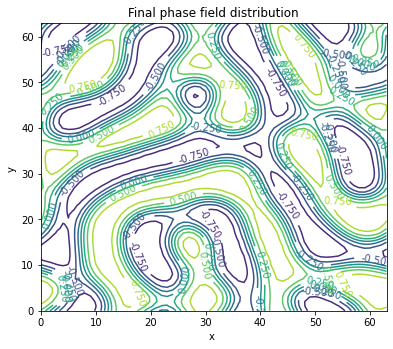

In [13]:
plt.close('all')

fig = plt.figure(figsize=(6, 5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])

X, Y = np.meshgrid(x, y)

cp = ax.contour(X, Y, phi)
ax.clabel(cp, inline=True,
              fontsize=10)
ax.set_title('Final phase field distribution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()

## Plotting the Free energy Functional over time

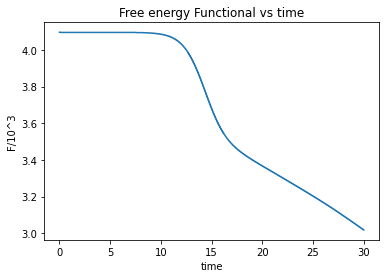

In [14]:
plt.close('all')

t = np.arange(nsteps)
plt.plot(t/1000, Fplot/1000)
plt.title("Free energy Functional vs time")
plt.xlabel("time")
plt.ylabel("F/10^3")
plt.show()